In [27]:
import os
from collections import defaultdict
import numpy as np
import joblib
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

In [28]:
mask_path = "/home/sl636/inria/AerialImageDataset/train/retiled_masks/"
img_path = "/home/sl636/inria/AerialImageDataset/train/retiled_images/"

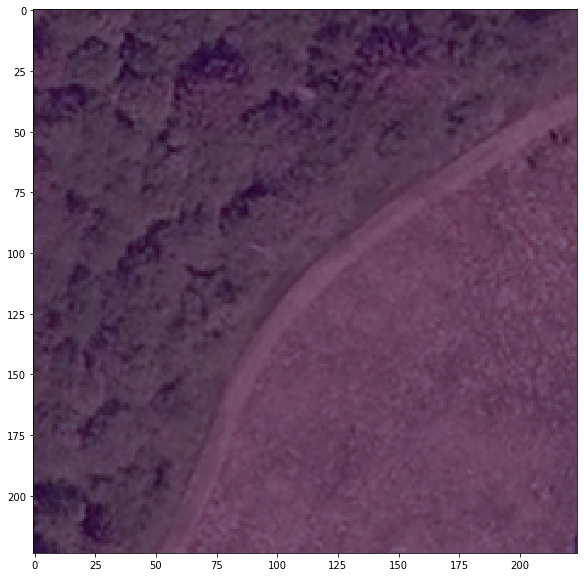

In [34]:
# Confirm that you can correctly look at an image with a mask
files = os.listdir(mask_path)
img = Image.open(mask_path+files[100])
base_img = Image.open(img_path+files[100])
plt.figure(figsize=(10,10))
plt.imshow(base_img)
plt.imshow(img, alpha=0.5)
plt.show()

In [30]:
# Create the transform needed 
trans = transforms.ToTensor()

In [15]:
# This function creates a generator that will generate a new masked
# example each time it is called

def get_masked_example():
	for fn in files:
		# Get the mask
		img = Image.open(mask_path+fn)
		yield img, base_img
		
ex_iter = get_masked_example()

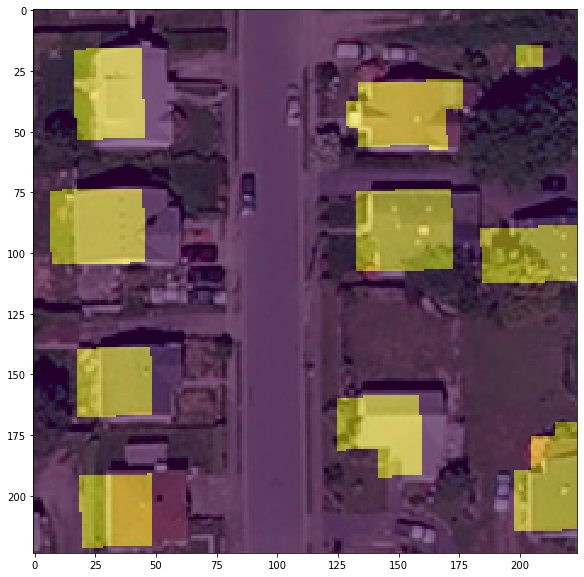

In [17]:
# Using the generator, you can run this cell multiple times to 
# look at examples
img, base = next(ex_iter)

plt.figure(figsize=(10,10))
plt.imshow(base)
plt.imshow(img, alpha=0.5)
plt.show()

In [47]:
# This piece of code was used to generate tensor versions of all of the images
# and save the results in a directory so that the model could very quickly
# just load the tensor of the mask, directly.

def tensorize(mask_dir, img_dir, files, mask_path, img_path):	
	if not os.path.exists(mask_dir):
		os.makedirs(mask_dir)
	if not os.path.exists(img_dir):
		os.makedirs(img_dir)

	for fn in files:
		try:
			mask = Image.open(mask_path+fn)
			if trans(mask).sum().item() > 0:
				# Save the object as a tensor
				name = fn.split(".")[0]
				trs_mask = trans(mask)
				trs_mask[trs_mask > 0] = 1
				img = Image.open(img_path+fn)
				trs_img = trans(img)
				trs_img[trs_img > 0] = 1
				torch.save(trs_mask, mask_dir+name+'.pt')
				torch.save(trs_img, img_dir+name+'.pt')
			else:
				os.remove(mask_path+fn)
				os.remove(img_path+fn)
		except FileNotFoundError:
			pass
	print('done!')


In [48]:

tensorize(mask_dir="/home/sl636/inria/AerialImageDataset/train/tensor_masks/",
        img_dir="/home/sl636/inria/AerialImageDataset/train/tensor_images/",
        files = files,
        mask_path=mask_path,
        img_path=img_path)

KeyboardInterrupt: 